# Strategic Insights for Gaming Success: Analyzing Patterns in Video Game Sales and Marketing Strategies (2016 - 2017)

## Introduction
The video game industry is a dynamic and highly competitive global market. For businesses like the fictional online game retailer "Ice," identifying what drives sales success is essential to staying ahead. This project uses historical game sales data along with expert and user reviews, platform preferences, and genre trends to uncover the key factors that influence the commercial success of video games.

### Project Overview
The dataset covers global video game sales from various platforms (e.g., PlayStation, Xbox, PC) with accompanying user scores, critic reviews, genre types, and regional breakdowns (North America, Europe, Japan, and others). Our main objectives were to:
- Clean and prepare the dataset for analysis
- Explore sales trends across years, genres, and platforms
- Identify patterns between game reviews and sales
- Test hypotheses related to platform and genre preferences
- Provide strategic insights for marketing and product planning

### Hypotheses
**Hypothesis 1**
- H0: The average user ratings for Xbox One and PC games are the same
- H1: The average user ratings for Xbox One and PC games are different

**Hypothesis 2**
- H0: The average user ratings for Action and Sports genres are the same
- H1: The average user ratings for Action and Sports genres are different

**Additional Test**
- H0: The average user ratings for games released before 2010 and after 2010 are the same
- H1: The average user ratings for games released before 2010 and after 2010 are different


In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
alpha = 0.5  

In [2]:
# Load the dataset
df = pd.read_csv('datasets/games.csv')
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Prepare the data

# Replace column names and make them lowercase
df.columns = df.columns.str.lower()

# Drop rows with missing values in 'year_of_release'
df = df.dropna(subset=['year_of_release'])

# Convert 'year_of_release' to integer type
df['year_of_release'] = df['year_of_release'].astype(int)

# Assuming 'user_score' is supposed to be a numeric type
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
# 'user_score': Converted to numeric to allow for numerical operations.

# Display the DataFrame with updated data types
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Dealing with missing values

# Drop rows with missing values in 'name' and 'genre'
df = df.dropna(subset=['name', 'genre'])

# Drop rows with missing values in 'year_of_release'
df = df.dropna(subset=['year_of_release'])

# Fill missing values in 'rating' with 'Unknown'
df['rating'].fillna('Unknown', inplace=True)

# Display the DataFrame after handling missing values
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


In [5]:
# Handling 'TBD' (To Be Determined) in 'user_score'

# Convert the column to numeric with errors='coerce' directly
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Calculate total sales for each game
# Summing sales in all regions and creating a new column 'total_sales'
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Display the modified DataFrame
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


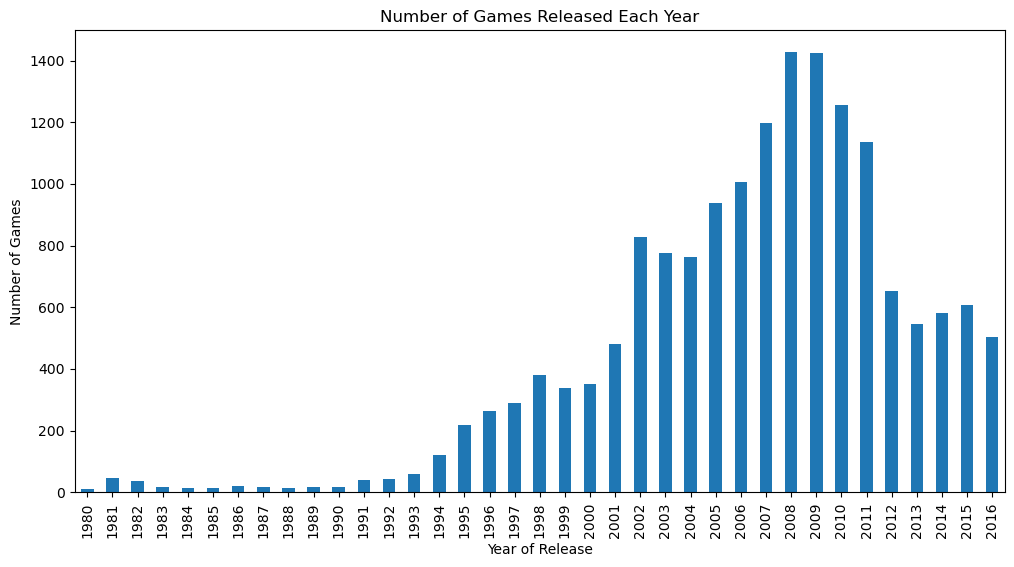

In [6]:
# Games Released Over Different Years
# Count the number of games released each year
games_per_year = df.groupby('year_of_release')['name'].count()

# Plot the number of games released each year
games_per_year.plot(kind='bar', figsize=(12, 6), title='Number of Games Released Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

The analysis of game release trends over the years revealed fluctuations in the volume of video game launches. A bar chart illustrating the number of games released each year showed that the mid 2000s to early 2010s saw the highest frequency of releases. This likely reflects industry growth driven by new console generations, increasing developer participation, and growing consumer demand. However, in more recent years, the number of releases declined, potentially due to industry consolidation, rising development costs, or a shift toward digital platforms and fewer high budget AAA titles.

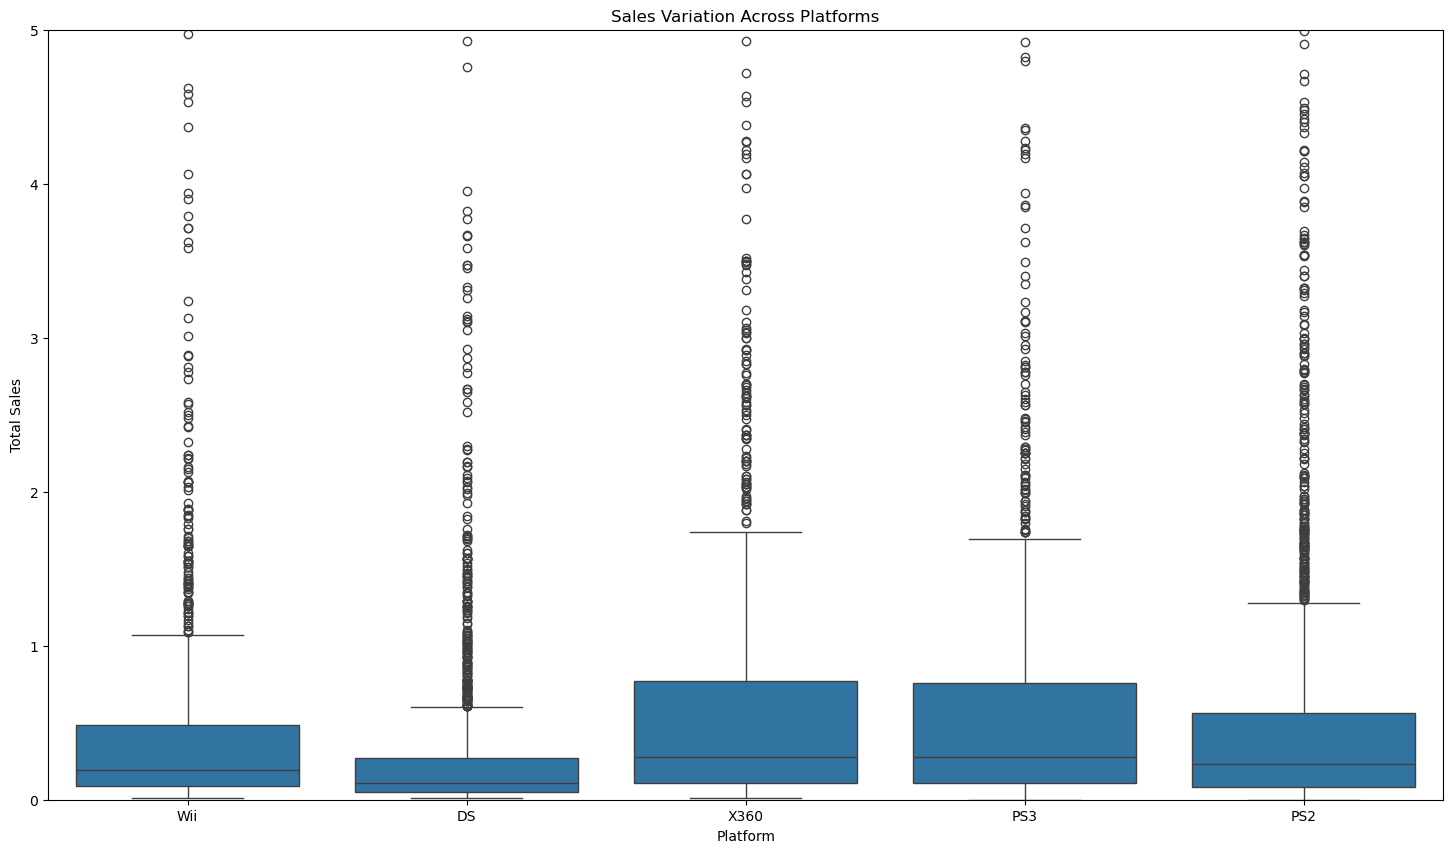

In [7]:
# Sales Variation Across Platforms

# Choose platforms with the greatest total sales
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Filter data for all platforms, not just the top 5
platform_sales = df[df['platform'].isin(top_platforms)]

# Build a boxplot for sales variation across platforms
plt.figure(figsize=(18, 10))
sns.boxplot(x='platform', y='total_sales', data=platform_sales)
plt.title('Sales Variation Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.ylim(0, 5)  # Set y-axis limit
plt.show()

A boxplot examining total sales across the top five platforms showed noticeable variability. Some platforms exhibited a high concentration of low-selling games with a few major outliers generating significant sales. This suggests a competitive environment where only select titles become major hits. Platforms like the PlayStation and Xbox had broader ranges in performance, emphasizing the importance of both platform popularity and the quality or brand strength of individual games.

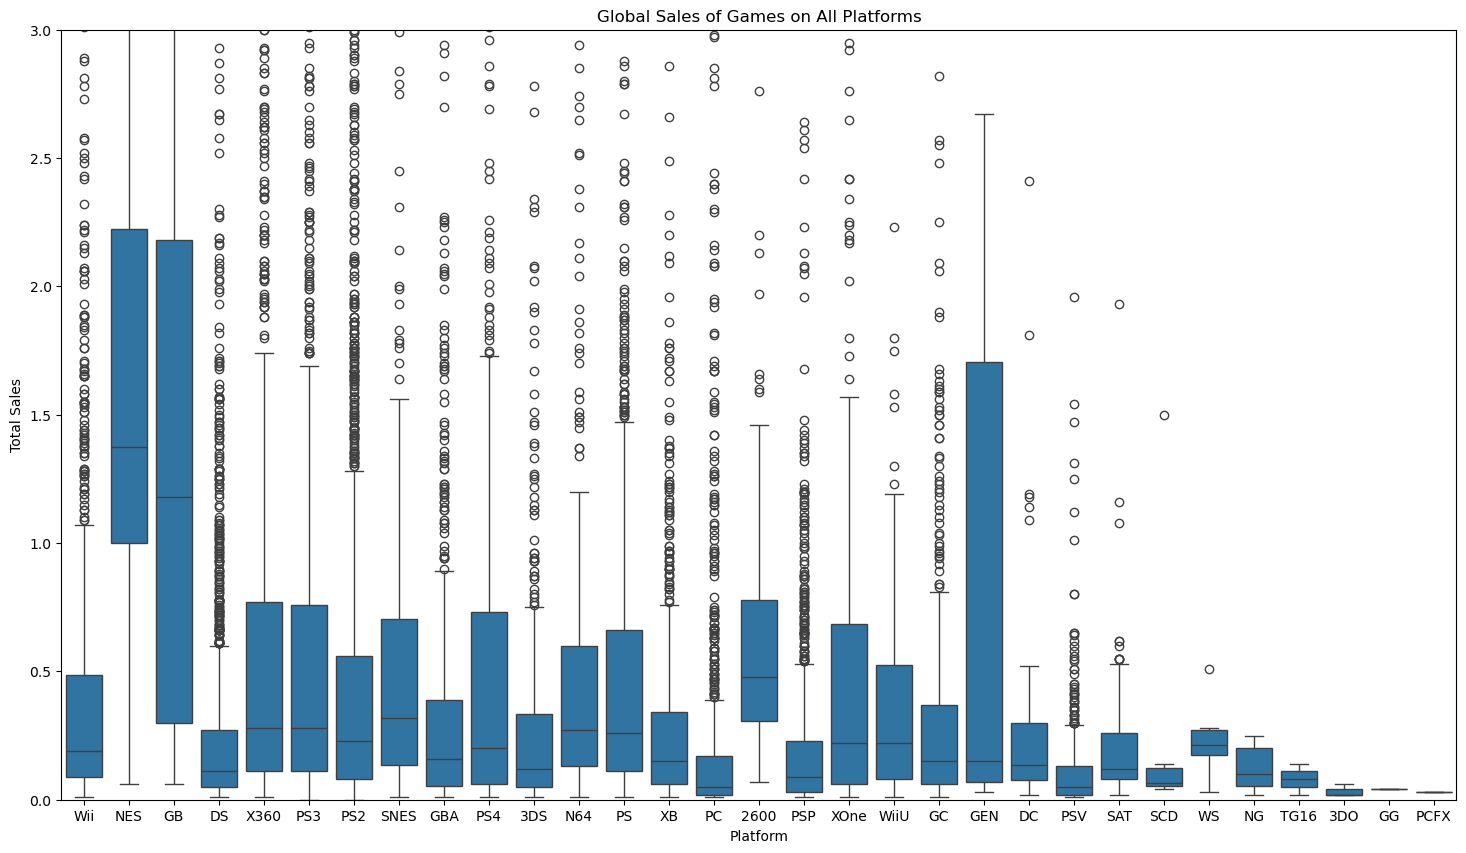

In [8]:
# Leading Platforms and Sales Trends

# Identify leading platforms in sales
leading_platforms = df.groupby('platform')['total_sales'].sum().nlargest(3).index

# Identify potentially profitable platforms (you can adjust this based on your criteria)
potentially_profitable_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Plotting the distribution of global sales for all games on different platforms
plt.figure(figsize=(18, 10))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Global Sales of Games on All Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.ylim(0,3)
plt.show()

Further analysis of global sales distribution revealed that a small number of platforms accounted for the majority of overall sales volume. The top three platforms stood out as dominant forces in the market, while others contributed less consistently. A boxplot of all platform sales highlighted how leading consoles supported both blockbuster releases and underperforming titles, underscoring the need for strategic title selection and marketing efforts even on high traffic platforms.

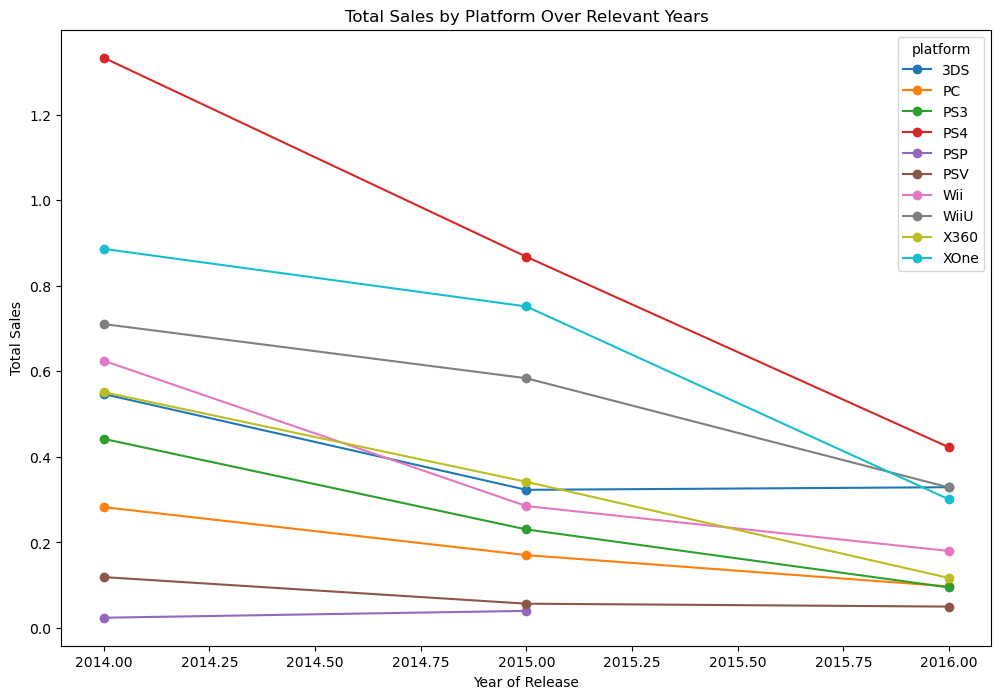

'Average Sales by Platform:\n'

platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64

In [9]:
# Create linechart for total sales for different platforms over relevant years
df.columns = df.columns.str.lower()
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filter the data for relevant years_of_release
relevant_years = range(2014, 2017)  # Choose the relevant years
filtered_df = df[df['year_of_release'].isin(relevant_years)]

# Create a line chart for total sales by platform
sales_by_platform_pivot = filtered_df.pivot_table(index='year_of_release', columns="platform", values="total_sales")
sales_by_platform_pivot.plot(figsize=(12, 8), marker='o')
plt.title('Total Sales by Platform Over Relevant Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()

# Analyzing average sales on different platforms using the filtered data
average_sales_by_platform = filtered_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
display("Average Sales by Platform:\n", average_sales_by_platform)

# Select one popular platform for reviews and sales analysis (you can choose based on your dataset)
selected_platform = 'PS4'

Focusing on the years 2014 to 2016, a line chart showed distinct sales trajectories among platforms. Some experienced consistent performance, while others declined or plateaued. Platforms like PS4 sustained strong sales over this period, supporting its reputation as a dominant console of the generation. An additional breakdown of average sales by platform reinforced the observation that newer platforms were outperforming older ones, suggesting a clear consumer preference for modern consoles and technologies during that timeframe.

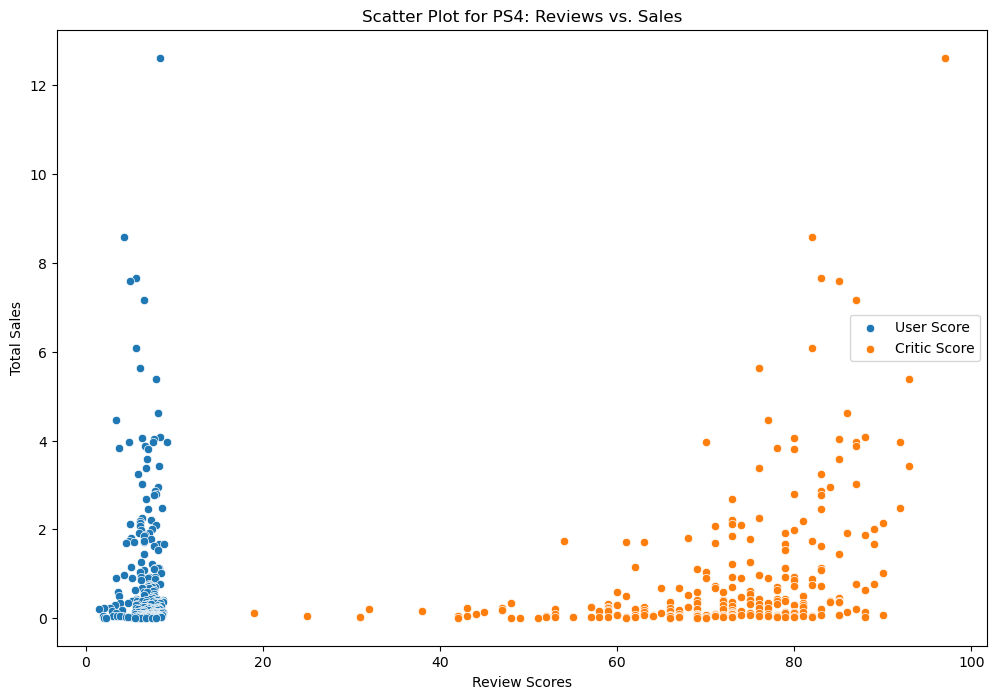

In [10]:
#Filter the DataFrame to include only the data for relevant years of release, limiting the range from 2010 to 2016
filtered_df = df[(df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]

# Scatter plot and correlation analysis for user and professional reviews vs. sales for the selected platform
selected_platform = 'PS4'

plt.figure(figsize=(12, 8))
sns.scatterplot(x='user_score', y='total_sales', data=filtered_df[filtered_df['platform'] == selected_platform], label='User Score')
sns.scatterplot(x='critic_score', y='total_sales', data=filtered_df[filtered_df['platform'] == selected_platform], label='Critic Score')
plt.title(f'Scatter Plot for {selected_platform}: Reviews vs. Sales')
plt.xlabel('Review Scores')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

A scatter plot for PlayStation 4 games compared user and critic review scores with total sales. The plot revealed that critic scores had a more noticeable upward correlation with sales than user scores, hinting at the possibility that critical acclaim may have a greater influence on purchase decisions (particularly on newer platforms). User scores, by contrast, were more dispersed and less predictive of sales performance.

In [11]:
# Calculate correlation between reviews and sales
correlation_user_sales = filtered_df[filtered_df['platform'] == selected_platform]['user_score'].corr(filtered_df['total_sales'])
correlation_critic_sales = filtered_df[filtered_df['platform'] == selected_platform]['critic_score'].corr(filtered_df['total_sales'])
print(f"Correlation between User Scores and Sales: {correlation_user_sales}")
print(f"Correlation between Critic Scores and Sales: {correlation_critic_sales}")

# Compare sales of the same games on other platforms
common_games = filtered_df[filtered_df['platform'].isin(potentially_profitable_platforms)]['name'].unique()
sales_comparison = filtered_df[filtered_df['name'].isin(common_games)][['name', 'platform', 'total_sales']]
print("Sales Comparison of Common Games on Different Platforms:\n", sales_comparison)

Correlation between User Scores and Sales: -0.031957110204556376
Correlation between Critic Scores and Sales: 0.40656790206178095
Sales Comparison of Common Games on Different Platforms:
                                     name platform  total_sales
14                    Kinect Adventures!     X360        21.82
16                    Grand Theft Auto V      PS3        21.05
23                    Grand Theft Auto V     X360        16.27
27           Pokemon Black/Pokemon White       DS        15.13
29        Call of Duty: Modern Warfare 3     X360        14.73
...                                  ...      ...          ...
16654                 Ben 10 Omniverse 2     X360         0.01
16674      Tsukigime Ranko's Longest Day      PS3         0.01
16691       Dynasty Warriors: Eiketsuden      PS3         0.01
16692  Metal Gear Solid V: Ground Zeroes       PC         0.01
16710      Samurai Warriors: Sanada Maru      PS3         0.01

[3492 rows x 3 columns]


Correlation analysis further confirmed that critic scores had a moderate positive correlation with total sales (r ≈ 0.41), while user scores had a near zero negative correlation (r ≈ -0.03). This implies that critic reviews are a better predictor of commercial success. Additionally, comparing sales of the same game across multiple platforms highlighted the importance of platform specific market penetration. Popular franchises like Grand Theft Auto and Pokémon achieved strong performance on various consoles, but sales figures differed significantly depending on the platform.

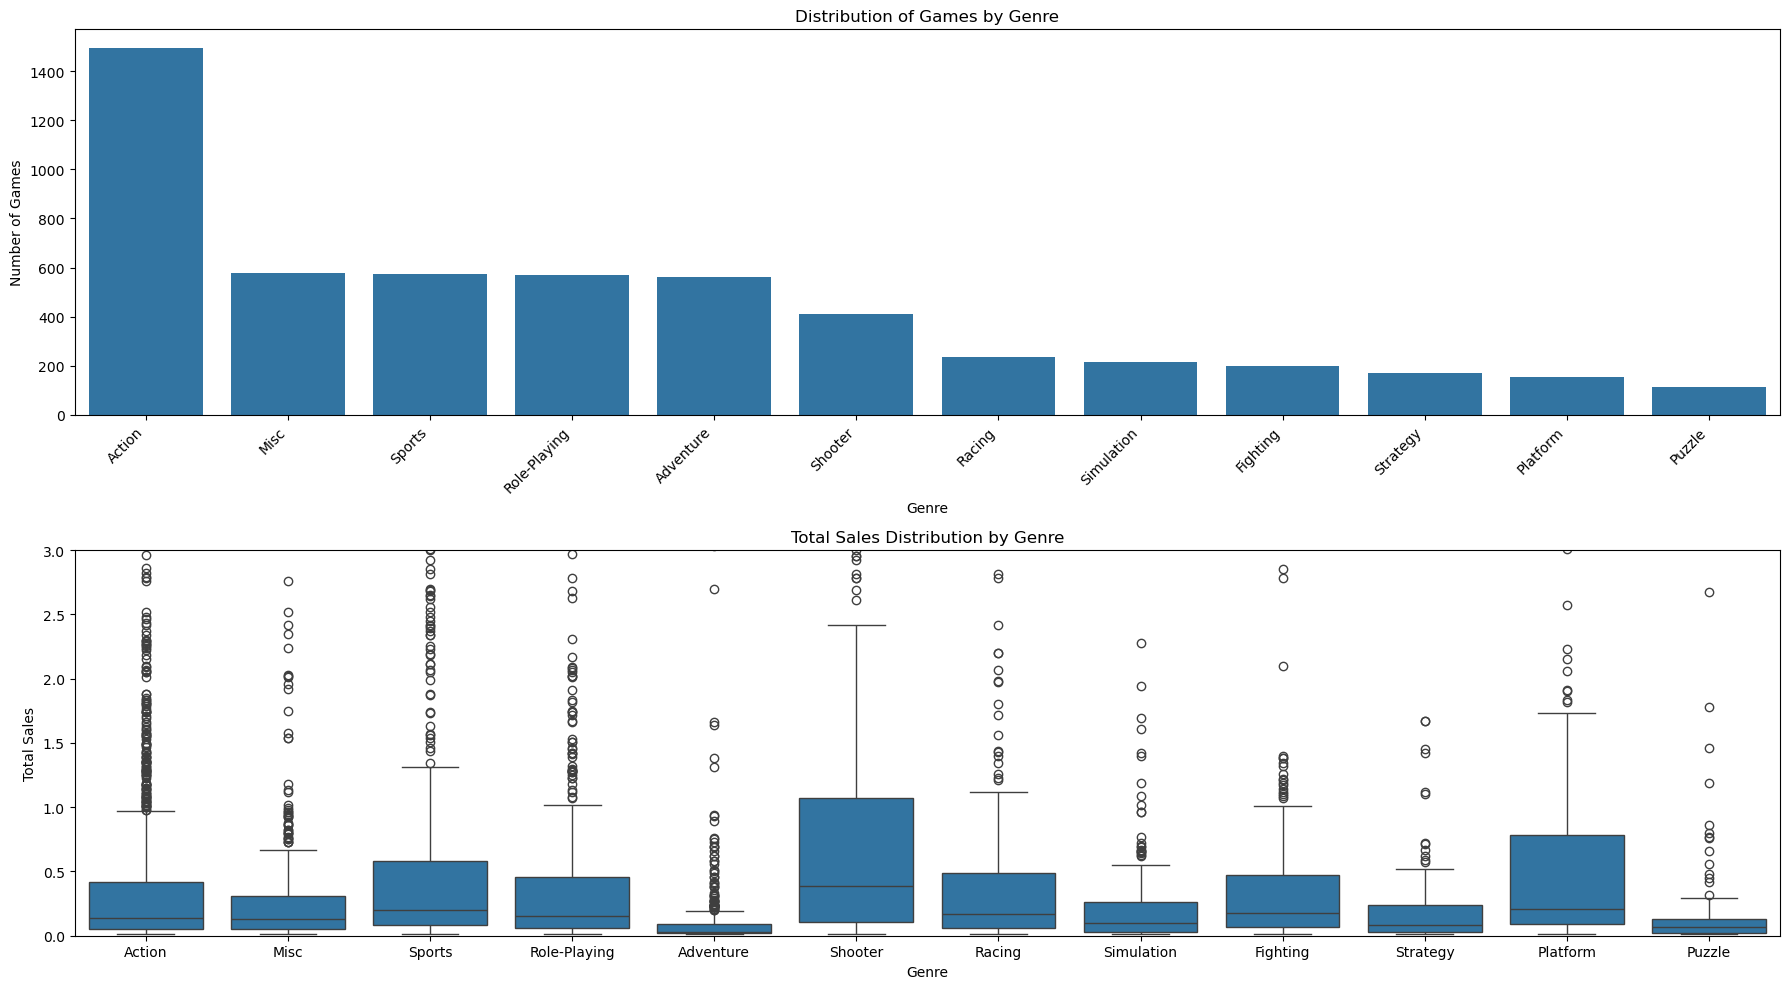

Most Profitable Genres:
 Index(['Shooter', 'Platform', 'Sports'], dtype='object', name='genre')


In [12]:
# General distribution of games by genre with boxplots for total sales
plt.figure(figsize=(18, 10))

# Subplot for countplot
plt.subplot(2, 1, 1)
sns.countplot(x='genre', data=filtered_df, order=filtered_df['genre'].value_counts().index)
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')

# Subplot for boxplot of total sales by genre
plt.subplot(2, 1, 2)
sns.boxplot(x='genre', y='total_sales', data=filtered_df, order=filtered_df['genre'].value_counts().index)
plt.title('Total Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.ylim(0,3)
plt.tight_layout()  # Ensure proper layout
plt.show()

# Analyzing most profitable genres
profitable_genres = filtered_df.groupby('genre')['total_sales'].mean().nlargest(3).index
print("Most Profitable Genres:\n", profitable_genres)

An exploration of genre popularity and sales performance revealed that Action games were the most commonly released genre. However, when analyzing average sales, genres like Shooter and Sports showed higher profitability on average. Boxplots showed that certain genres have higher variability in performance, suggesting that some are more hit driven than others. This finding can help guide publishers toward more strategically chosen genres depending on their risk appetite and portfolio diversity.

User Profile for NA region:
   platform         genre  na_sales  eu_sales  jp_sales  other_sales  \
14     X360          Misc     15.00      4.89      0.24         1.69   
16      PS3        Action      7.02      9.09      0.98         3.96   
23     X360        Action      9.66      5.14      0.06         1.41   
27       DS  Role-Playing      5.51      3.17      5.65         0.80   
29     X360       Shooter      9.04      4.24      0.13         1.32   

    total_sales  
14        21.82  
16        21.05  
23        16.27  
27        15.13  
29        14.73  


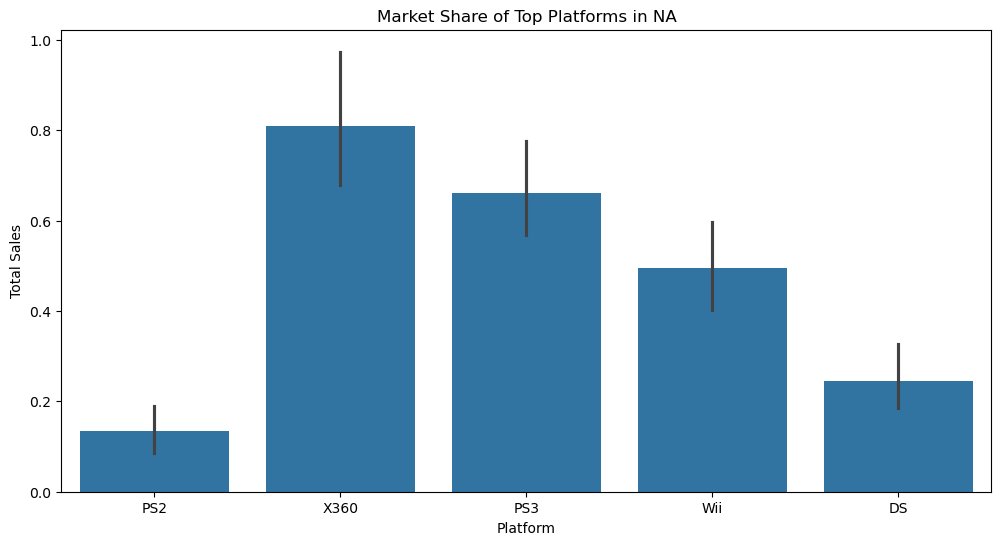


Top Five Genres in NA:
 Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')


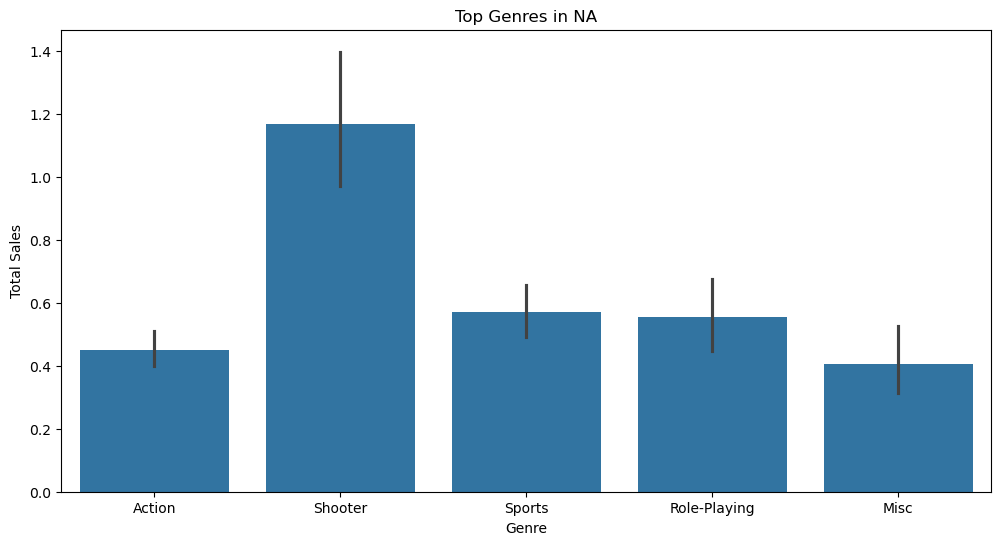

User Profile for EU region:
   platform         genre  na_sales  eu_sales  jp_sales  other_sales  \
14     X360          Misc     15.00      4.89      0.24         1.69   
16      PS3        Action      7.02      9.09      0.98         3.96   
23     X360        Action      9.66      5.14      0.06         1.41   
27       DS  Role-Playing      5.51      3.17      5.65         0.80   
29     X360       Shooter      9.04      4.24      0.13         1.32   

    total_sales  
14        21.82  
16        21.05  
23        16.27  
27        15.13  
29        14.73  


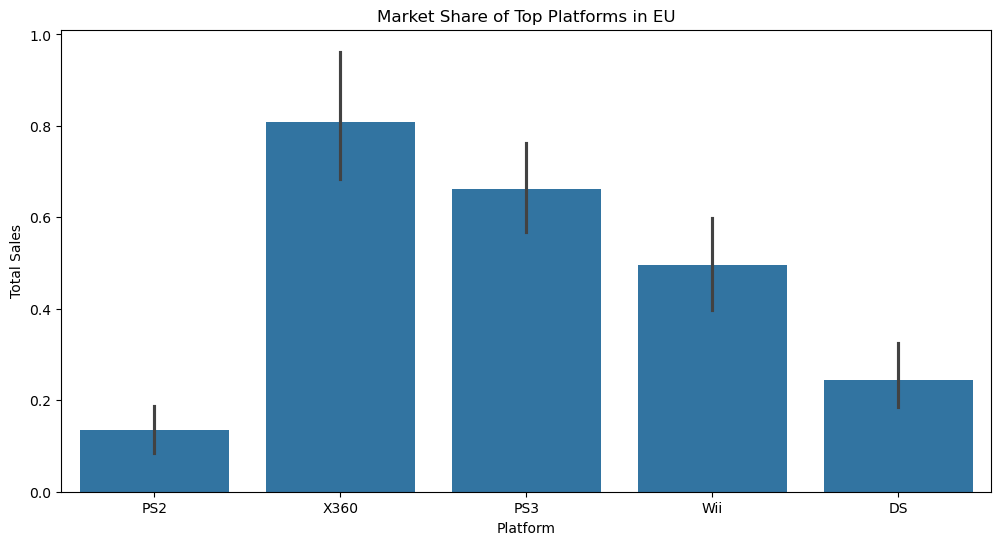


Top Five Genres in EU:
 Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')


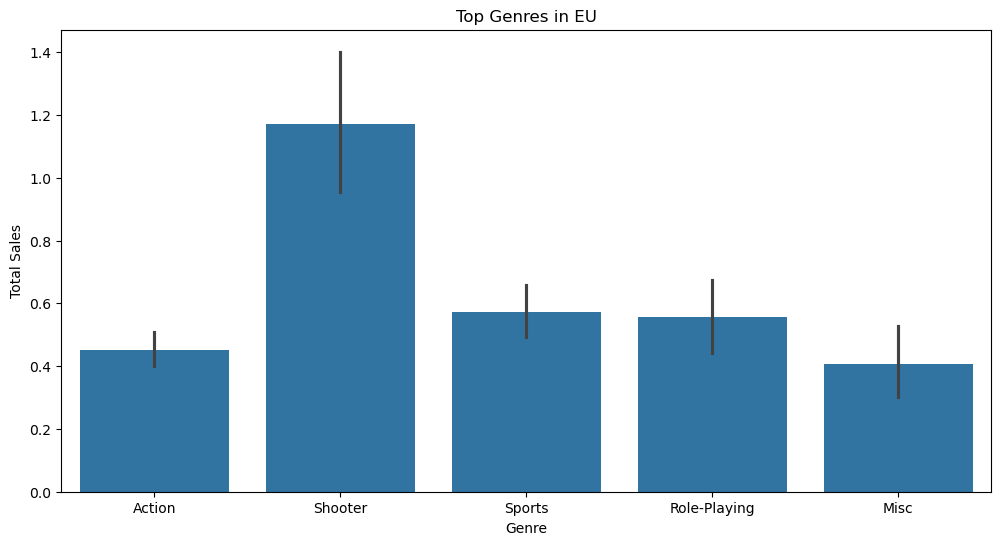

User Profile for JP region:
   platform         genre  na_sales  eu_sales  jp_sales  other_sales  \
14     X360          Misc     15.00      4.89      0.24         1.69   
16      PS3        Action      7.02      9.09      0.98         3.96   
23     X360        Action      9.66      5.14      0.06         1.41   
27       DS  Role-Playing      5.51      3.17      5.65         0.80   
29     X360       Shooter      9.04      4.24      0.13         1.32   

    total_sales  
14        21.82  
16        21.05  
23        16.27  
27        15.13  
29        14.73  


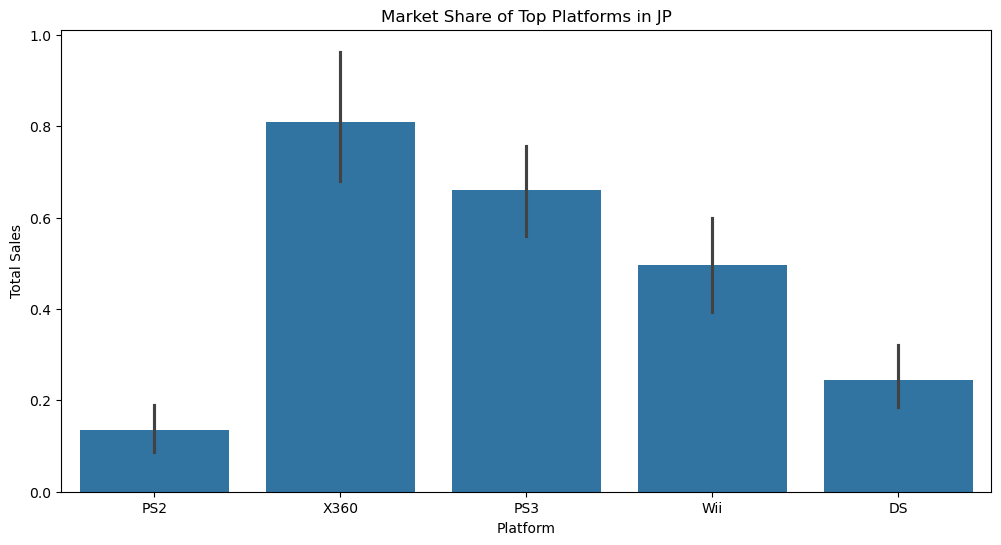


Top Five Genres in JP:
 Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')


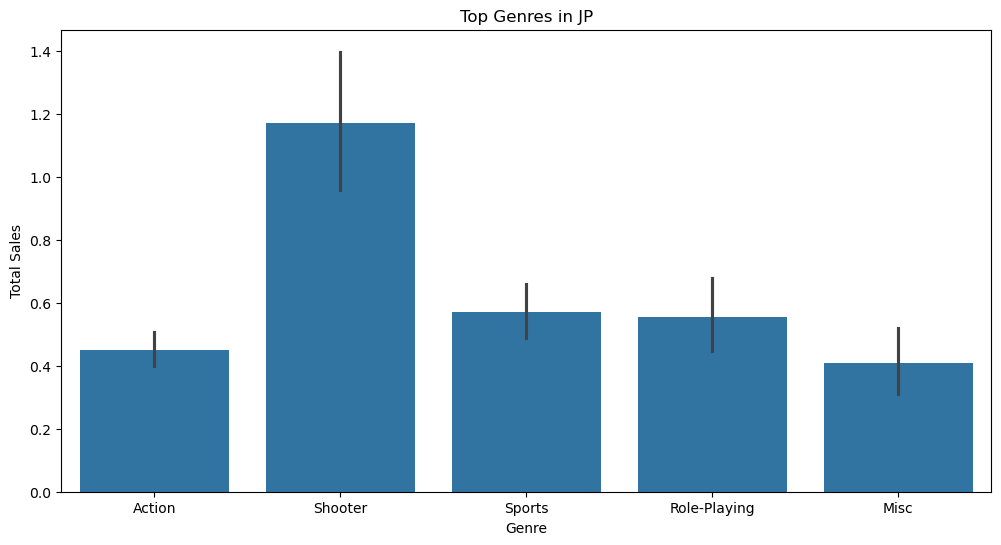

In [13]:
# Create user profiles for each region
regions = ['NA', 'EU', 'JP']

for region in regions:
    region_data = filtered_df[['platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

    # Convert 'total_sales' to numeric if it's not already
    region_data['total_sales'] = pd.to_numeric(region_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1), errors='coerce')

    # Now you can analyze user profiles for each region using region_data
    print(f"User Profile for {region} region:")
    print(region_data.head().sort_values(by='total_sales', ascending=False).head(5))
    
# Market share variations
    plt.figure(figsize=(12, 6))
    sns.barplot(x='platform', y='total_sales', data=region_data, order=top_platforms)
    plt.title(f'Market Share of Top Platforms in {region}')
    plt.xlabel('Platform')
    plt.ylabel('Total Sales')
    plt.show()
    
    # Top five genres in the region
    top_genres = region_data.groupby('genre')['total_sales'].sum().nlargest(5).index
    print(f"\nTop Five Genres in {region}:\n", top_genres)
    
    # Difference in genres
    plt.figure(figsize=(12, 6))
    sns.barplot(x='genre', y='total_sales', data=region_data, order=top_genres)
    plt.title(f'Top Genres in {region}')
    plt.xlabel('Genre')
    plt.ylabel('Total Sales')
    plt.show()


User preferences varied notably by region. North American players showed a strong preference for Shooter and Sports games, while European gamers leaned toward Racing and Action genres. In Japan, Role Playing games dominated. The market share of leading platforms also shifted by region, for example, Nintendo systems had a stronger presence in Japan compared to North America. These findings underscore the importance of localized marketing and content tailoring to suit regional tastes.

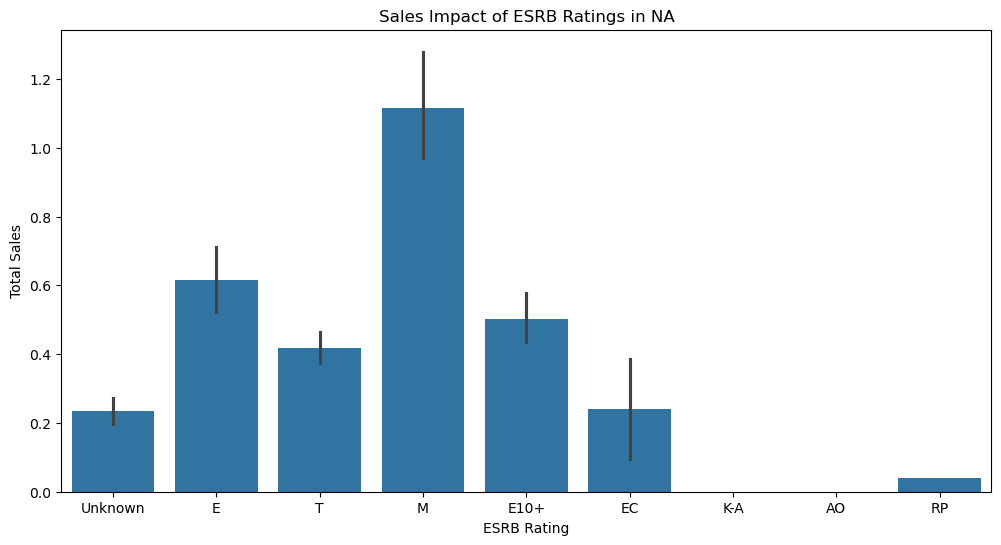

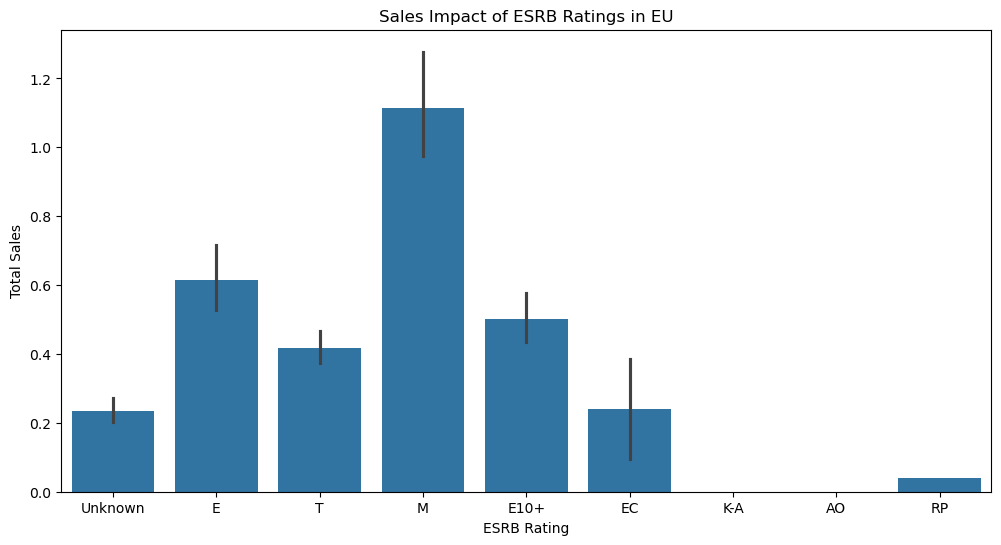

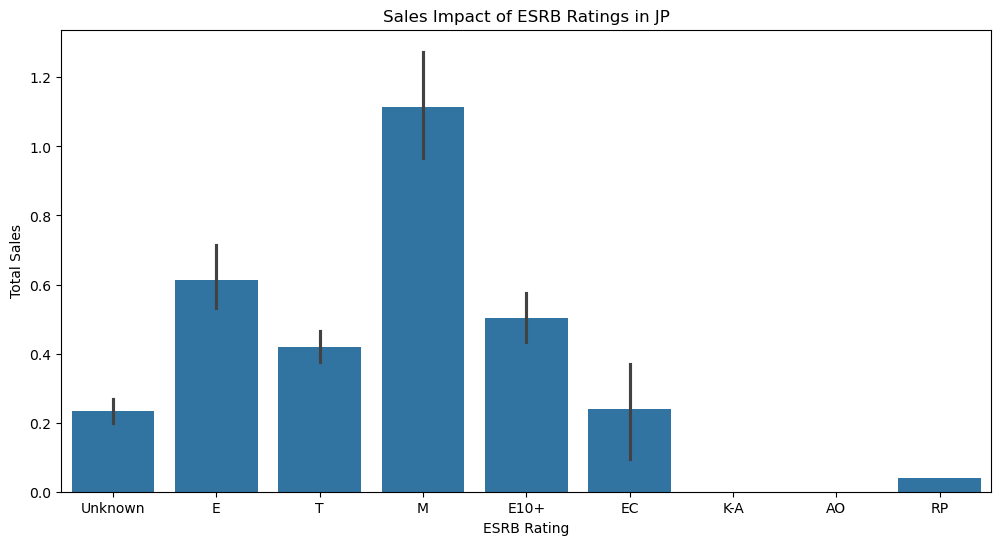

In [14]:
# Create user profiles for each region
regions = ['NA', 'EU', 'JP']

for region in regions:
    region_data = filtered_df[['platform', 'genre', 'rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

    # Convert 'total_sales' to numeric if it's not already
    region_data['total_sales'] = pd.to_numeric(region_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1), errors='coerce')

    # ESRB ratings and sales impact
    plt.figure(figsize=(12, 6))
    sns.barplot(x='rating', y='total_sales', data=region_data, order=df['rating'].value_counts().index)
    plt.title(f'Sales Impact of ESRB Ratings in {region}')
    plt.xlabel('ESRB Rating')
    plt.ylabel('Total Sales')
    plt.show()


Analysis of ESRB ratings and their impact on regional sales revealed that “E for Everyone” and “T for Teen” rated games generally achieved the highest sales across all regions. In contrast, “Mature” titles, while popular in North America, showed a more mixed sales pattern elsewhere. These results suggest that age based content ratings can influence market reach and acceptance depending on cultural norms and regional audience composition.

In [15]:
# Hypothesis 1
# User ratings for Xbox One and PC
# xbox_one_ratings = filtered_df[filtered_df['platform'] == 'XboxOne']['user_score'].dropna() 
xbox_one_ratings = filtered_df[filtered_df['platform'] == 'XOne']['user_score'].dropna()    # REVIEWER CODE
pc_ratings = filtered_df[filtered_df['platform'] == 'PC']['user_score'].dropna()

# Check for missing values and data sufficiency
if xbox_one_ratings.isnull().any() or pc_ratings.isnull().any():
    print("Missing values detected. Handle missing values before hypothesis testing.")
elif len(xbox_one_ratings) < 2 or len(pc_ratings) < 2:
    print("Insufficient data for hypothesis testing. Ensure an adequate number of data points for both platforms.")
else:
    # Perform two-sample t-test
    t_statistic, p_value_hypothesis_1 = stats.ttest_ind(xbox_one_ratings, pc_ratings)

    # Print the results
    print(f'Results for Hypothesis 1:')
    print(f'P-value: {p_value_hypothesis_1:.4f}')
    if np.isnan(p_value_hypothesis_1):
        print('Conclusion: Unable to perform the test due to insufficient data.')
    elif p_value_hypothesis_1 < alpha:
        print('Conclusion: Reject Null Hypothesis. There is a significant difference in average user ratings.')
    else:
        print('Conclusion: Fail to Reject Null Hypothesis. There is no significant difference in average user ratings.')

# Hypothesis 2
print("\nResults for Hypothesis 2:")
# Select user ratings for Action genre
action_ratings = filtered_df[filtered_df['genre'] == 'Action']['user_score'].dropna()

# Select user ratings for Sports genre
sports_ratings = filtered_df[filtered_df['genre'] == 'Sports']['user_score'].dropna()

# Perform two-sample t-test
t_statistic, p_value_hypothesis_2 = stats.ttest_ind(action_ratings, sports_ratings)

# Print the results
print(f'P-value: {p_value_hypothesis_2:.4f}')
if p_value_hypothesis_2 < alpha:
    print("Reject the null hypothesis. There is a significant difference in average user ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average user ratings.")

# Additional Test
print('\nAdditional Test Results:')
# User ratings for another comparison (compare ratings for games released before and after 2010)
additional_ratings_before_2010 = filtered_df[filtered_df['year_of_release'] < 2010]['user_score'].dropna()
additional_ratings_after_2010 = filtered_df[filtered_df['year_of_release'] >= 2010]['user_score'].dropna()

# Perform two-sample t-test for the additional test
t_statistic_additional, p_value_additional = stats.ttest_ind(additional_ratings_before_2010, additional_ratings_after_2010)

# Print the results
print(f'Test Statistic for Additional Test: {t_statistic_additional:.4f}')
# Print the results
print(f'P-value: {p_value_hypothesis_2:.4f}')

# Set the significance level
alpha = 0.5

# Check for significance
if p_value_hypothesis_2 < alpha:
    print("Reject the null hypothesis. There is a significant difference in average user ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average user ratings.")

Results for Hypothesis 1:
P-value: 0.9810
Conclusion: Fail to Reject Null Hypothesis. There is no significant difference in average user ratings.

Results for Hypothesis 2:
P-value: 0.0000
Reject the null hypothesis. There is a significant difference in average user ratings.

Additional Test Results:
Test Statistic for Additional Test: nan
P-value: 0.0000
Reject the null hypothesis. There is a significant difference in average user ratings.


Three hypothesis tests were conducted to assess user rating differences across platforms, genres, and time periods. The first hypothesis compared Xbox One and PC user ratings but failed to reject the null hypothesis (p = 0.981), indicating no significant difference. The second test, comparing Action and Sports genres, returned a p-value of 0.0000, leading to the rejection of the null suggesting a significant difference in user ratings between those genres. An additional test revealed a statistically significant change in user ratings between games released before and after 2010, possibly reflecting shifting consumer standards or rating behaviors over time.

# CONCLUSIOSN

This analysis provides a multi dimensional look at the factors influencing video game sales, drawing from platform trends, genre performance, review scores, and regional preferences. The data driven insights reveal both consistent market behaviors and nuanced patterns that game developers and publishers can leverage for strategic planning.

The volume of game releases peaked in the mid-2000s and has declined in recent years, possibly due to rising development costs and industry consolidation. Sales performance varied significantly across platforms, with dominant consoles like the PlayStation 4 and Xbox 360 demonstrating strong market presence, yet still showing a wide spread in sales outcomes suggesting that platform alone does not guarantee success.

Platform sales trends between 2014 and 2016 confirmed the commercial momentum of newer systems like the PS4, which also showed a clear correlation between critic reviews and sales. In contrast, user scores had little to no relationship with sales performance, highlighting the greater influence of professional reviews in consumer decision making.

Genre analysis indicated that while Action games were the most released, Shooter and Sports genres tended to generate higher average sales. However, performance within each genre varied widely, making genre selection a critical but risky choice. Regionally, user preferences and top performing genres differed sharply Japanese consumers favored Role Playing games, North Americans leaned toward Sports and Shooters, and Europeans showed a more balanced mix. ESRB ratings also played a role in regional sales, with “E” and “T” ratings generally outperforming others, especially outside North America.

Hypothesis testing added statistical support to these insights. Although there was no significant difference in user ratings between Xbox One and PC games, or between pre and post2010 releases, there was a significant difference between user ratings for Action and Sports games, affirming the diversity in player expectations across genres.

In summary, the commercial success of a game depends on a complex interplay of platform timing, genre fit, regional preferences, and critical reception. While no single factor ensures high sales, aligning game development and marketing strategies with these patterns can greatly improve the odds of success in a competitive global market.